In [115]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.10.0


In [116]:
(X_train, X_test), (y_train, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [117]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [118]:
inputs = [X_train, X_test, y_train, y_test]
for x in inputs:
    print(x.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [119]:
print(y_test)

[9 2 1 ... 8 1 5]


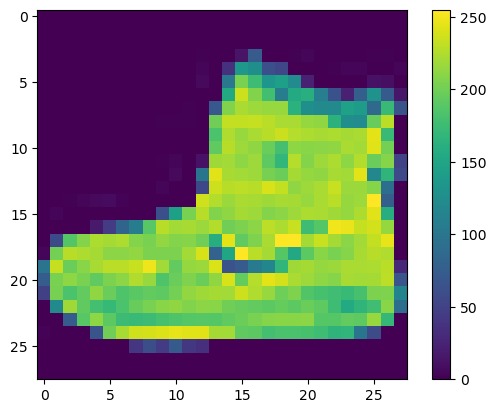

In [120]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.show()

In [121]:
X_train = X_train / 255.0
y_train = y_train / 255.0

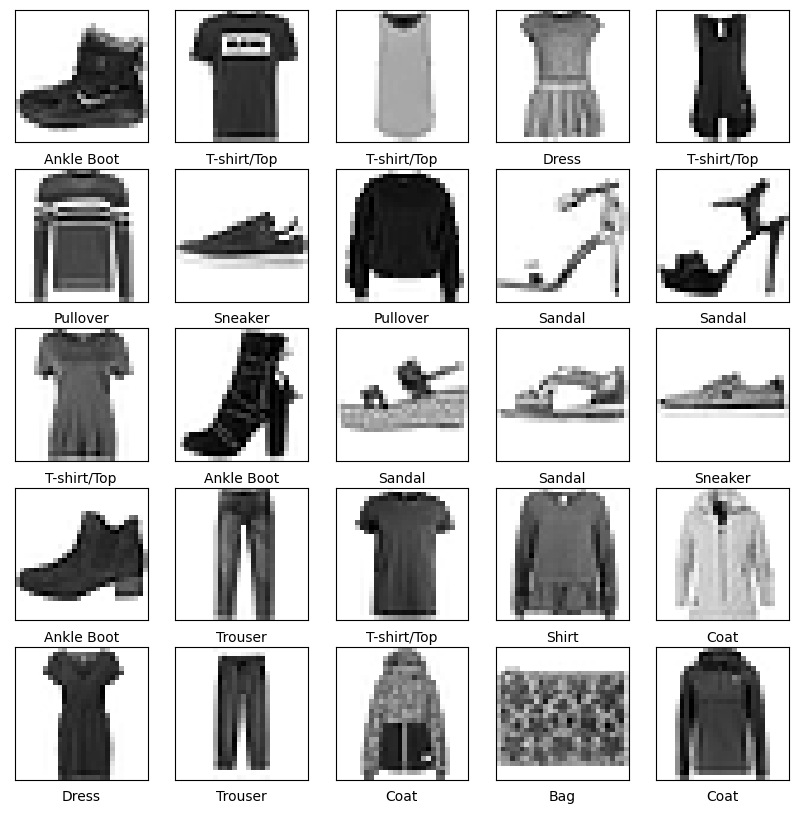

In [124]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[X_test[i]])
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-01-13 14:46:33.284913: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-13 14:46:33.285090: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
from keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model.fit(X_train, X_test, epochs=10)

Epoch 1/10


2023-01-13 14:52:58.771664: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-13 14:52:58.996765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 16s 7ms/step - loss: 0.5000 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3769 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3375 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3128 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2949 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2809 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2697 - accuracy: 0.8992
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2562 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2491 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2392

In [123]:
loss, accuracy = model.evaluate(y_train, y_test, verbose=2)

313/313 - 2s - loss: 0.3501 - accuracy: 0.8785 - 2s/epoch - 5ms/step


In [130]:
from keras.layers import Softmax

prob_model = Sequential([model, Softmax()])
pred = prob_model.predict(y_train)

 80/313 [======>.......................] - ETA: 0s

2023-01-13 15:02:23.716447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


9
9


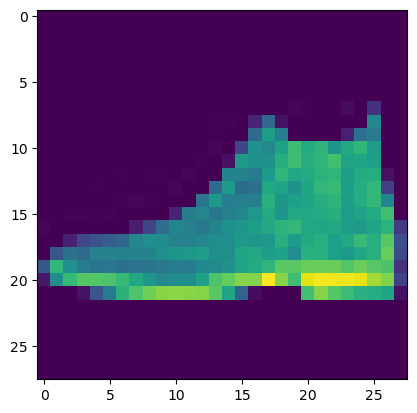

In [138]:
print(np.argmax(pred[0]))
print(y_test[0])
plt.imshow(y_train[0])

In [139]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

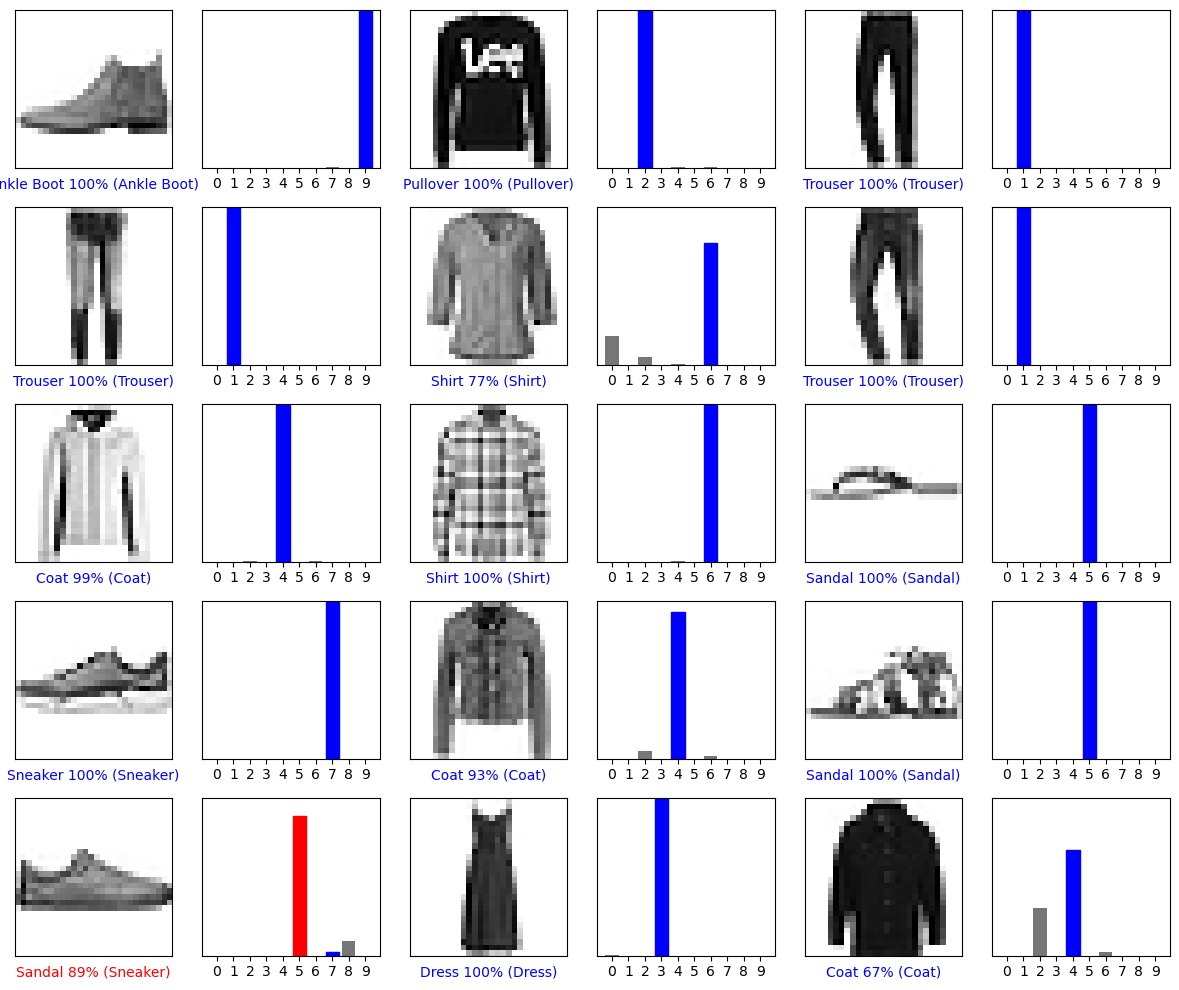

In [141]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred[i], y_test, y_train)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred[i], y_test)
plt.tight_layout()
plt.show()

In [143]:
img = y_train[1]
print(img.shape)
img = (np.expand_dims(img,0))
print(img.shape)

(28, 28)
(1, 28, 28)


In [144]:
prediction = prob_model.predict(img)

print(prediction)

1/1 [==============================] - 1s 638ms/step
[[7.2496669e-06 2.4096715e-15 9.9764454e-01 3.0395471e-12 1.0018046e-03
  1.8872756e-15 1.3463681e-03 2.2286169e-18 3.0261230e-12 9.0349332e-17]]


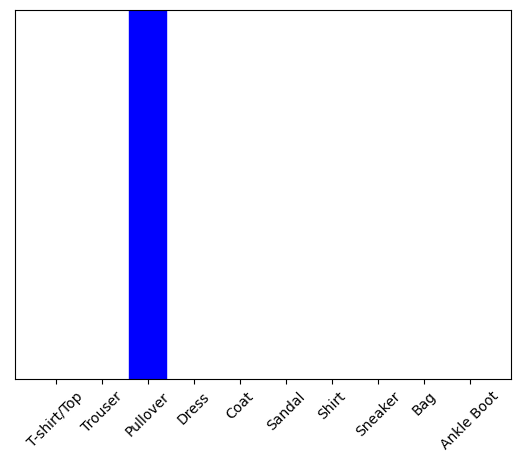

In [145]:
plot_value_array(1, prediction[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [147]:
class_names[np.argmax(prediction[0])]

'Pullover'